In [161]:
import numpy as np
from sklearn import svm, discriminant_analysis
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from itertools import combinations
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import matplotlib.pyplot as plt
from itertools import combinations

# Ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [162]:
# Loading the dataset
data = pd.read_csv("./breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [163]:
# dropping unnecessary columns
data.drop('id',axis=1,inplace=True)

In [164]:
data['diagnosis'] = (data['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [165]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [166]:
# Separating the features and class label
class_label = 'diagnosis'  # the label column is named 'diagnosis'
features = data.columns[1:]  # All columns except the first one (diagnosis)
i1 = 0  # Class 0
i2 = 1  # Class 1


In [167]:
# Extracting classes
C1 = data[data[class_label] == i1].loc[:, features].values
C2 = data[data[class_label] == i2].loc[:, features].values

In [168]:
B = C1  # Class B
M = C2  # Class M

In [169]:
print('************   seeds  ***************')
print('SAMPLE SIZE : ')
print(f'  # OBJECTS : {len(B) + len(M)}')
print(f'  # FEATURES: {B.shape[1]}')

print(f' BALANCE : {len(B) / len(M)}')

************   seeds  ***************
SAMPLE SIZE : 
  # OBJECTS : 569
  # FEATURES: 30
 BALANCE : 1.6839622641509433


In [170]:
# Random permutation of objects in data
PP = 1
if PP == 1:
    B = B[np.random.permutation(len(B))]
    M = M[np.random.permutation(len(M))]
    print('within random permutation of objects')
else:
    print('without random permutation of objects')

within random permutation of objects


In [171]:
# Normalization to mean=0 and standard deviation=1 with respect to class B
NN = 1
if NN == 1:
    print('with normalisation')
    
    # Normalize data with respect to B using StandardScaler
    scaler = StandardScaler()
    B = scaler.fit_transform(B)  # Normalize B
    M = scaler.transform(M)  # Normalize M based on B's stats
else:
    print('without normalisation')

with normalisation


In [172]:
# Parameters function to calculate LDA or SVM classification
def parameters(x2, x3, classifier_type):
    err = 0
    vector = []
    
    y2 = np.zeros(len(x2))
    y3 = np.ones(len(x3))

    if classifier_type == 'LDA':
        model = LDA()
        model.fit(np.vstack((x2, x3)), np.hstack((y2, y3)))
        classifier = np.hstack((model.coef_[0], model.intercept_))

    elif classifier_type == 'SVM':
        model = svm.SVC(kernel='linear')
        model.fit(np.vstack((x2, x3)), np.hstack((y2, y3)))
        classifier = np.hstack((-model.coef_[0], model.intercept_))
    
    return classifier, err, classifier_type, vector

In [173]:
# ERRS function to calculate classification accuracy
def ERRS(C1_test, C2_test, classifier):
    count = 0
    for i in range(len(C2_test)):
        if np.dot(C2_test[i], classifier[:-1]) - classifier[-1] >= 0:
            pass
        else:
            count += 1

    for i in range(len(C1_test)):
        if np.dot(C1_test[i], classifier[:-1]) - classifier[-1] >= 0:
            count += 1
        else:
            pass

    main = count / (len(C1_test) + len(C2_test)) * 100
    return main

In [174]:
# Initial classification
initial = 'SVM'
ref = 'SVM'

In [175]:
print('Refinement in d-1 dimensional space')

Refinement in d-1 dimensional space


In [176]:
classifier_ini, err, initial, vector = parameters(B, M, initial)
print(f'Initial Accuracy: {ERRS(B, M, classifier_ini)}%')

Initial Accuracy: 98.94551845342706%


In [177]:
# Generate all possible combinations of k=2 elements from d dimensions
k = 2
P = list(combinations(range(B.shape[1]), k))  # all possible combinations of k elements from 1:d

RESULTS = []

In [178]:
for combo in P:
    I1 = list(combo)  # Elements to fuse (reduce)
    I2 = list(set(range(B.shape[1])) - set(I1))  # Remaining dimensions
    
    # Dimensionality reduction
    REF_B = np.column_stack((np.sum(B[:, I1] * classifier_ini[I1], axis=1), B[:, I2]))
    REF_M = np.column_stack((np.sum(M[:, I1] * classifier_ini[I1], axis=1), M[:, I2]))

    # Refinement
    classifier, err, ref, vector = parameters(REF_B, REF_M, ref)
    
    # Store results (combination and accuracy)
    accuracy = ERRS(REF_B, REF_M, classifier)
    RESULTS.append([*I1, accuracy])

In [179]:
# Convert results to a NumPy array for easier manipulation or display
RESULTS = np.array(RESULTS)

In [180]:
print('\nResults of refinement:')
with np.printoptions(threshold=np.inf):
    print(RESULTS)



Results of refinement:
[[ 0.          1.         98.94551845]
 [ 0.          2.         98.94551845]
 [ 0.          3.         98.94551845]
 [ 0.          4.         98.94551845]
 [ 0.          5.         98.94551845]
 [ 0.          6.         98.94551845]
 [ 0.          7.         98.94551845]
 [ 0.          8.         98.94551845]
 [ 0.          9.         98.94551845]
 [ 0.         10.         98.94551845]
 [ 0.         11.         99.12126538]
 [ 0.         12.         98.94551845]
 [ 0.         13.         98.94551845]
 [ 0.         14.         99.12126538]
 [ 0.         15.         98.94551845]
 [ 0.         16.         98.94551845]
 [ 0.         17.         98.76977153]
 [ 0.         18.         98.76977153]
 [ 0.         19.         98.94551845]
 [ 0.         20.         98.94551845]
 [ 0.         21.         98.94551845]
 [ 0.         22.         98.94551845]
 [ 0.         23.         98.94551845]
 [ 0.         24.         98.76977153]
 [ 0.         25.         98.94551845]
 

## **Generalisation ability comparison**

In [213]:

print('Comparing generalization abilities of initial classifier and refinement')

# Holdout Method: 50/50 split
n = 2  # for 50/50 split
i1 = round(B.shape[0] / n)  # Index for splitting B
i2 = round(M.shape[0] / n)  # Index for splitting M

Comparing generalization abilities of initial classifier and refinement


In [182]:
# Splitting data into train and test sets (50/50)
test_B, train_B = B[:i1], B[i1:]
test_M, train_M = M[:i2], M[i2:]

In [183]:
# Initial classification
initial = 'SVM'
classifier_ini, err, initial, vector = parameters(train_B, train_M, initial)
print(f'Accuracy of TEST (initial): {ERRS(test_B, test_M, classifier_ini)}%')

Accuracy of TEST (initial): 97.1830985915493%


In [184]:
# Generate all possible combinations of k=2 elements from d dimensions
k = 2
P = list(combinations(range(B.shape[1]), k))  # all possible combinations (fusions) of k elements from 1:d


In [185]:
# Define the fusion index (choose one fusion to reduce the dimension)
FUSION = 12

In [186]:
for i in [FUSION - 1]:  # Python uses 0-based indexing, so subtract 1 from FUSION
    I1 = list(P[i])  # Elements to fuse (reduce)
    I2 = list(set(range(B.shape[1])) - set(I1))  # Remaining dimensions

    # Dimensionality reduction for the entire dataset (B and M)
    REF_B = np.column_stack((np.sum(B[:, I1] * classifier_ini[I1], axis=1), B[:, I2]))
    REF_M = np.column_stack((np.sum(M[:, I1] * classifier_ini[I1], axis=1), M[:, I2]))

    # Splitting reduced dimensions into train and test sets (50/50)
    test_REF_B, train_REF_B= REF_B[:i1], REF_B[i1:]
    test_REF_M, train_REF_M = REF_M[:i2], REF_M[i2:]

    # Refinement
    ref = 'SVM'  # Or you can set it to 'LDA'
    classifier_refined, err, ref, vector = parameters(train_REF_B, train_REF_M, ref)

    # Test accuracy after refinement
    print(f'Accuracy of TEST (refinement): {ERRS(test_REF_B, test_REF_M, classifier_refined)}%')


Accuracy of TEST (refinement): 97.1830985915493%


## **k-fold cross validation**

In [187]:
# Set k for k-fold cross-validation
k = 5
print(f'k = {k}')

k = 5


In [188]:
# Compute the indices for the K-fold cross-validation
i1 = round(len(B) / k)
i2 = round(len(M) / k)


In [189]:
# Creating index splits for B and M
IND1 = [0] + [i1 * i for i in range(1, k)] + [len(B)]
IND2 = [0] + [i2 * i for i in range(1, k)] + [len(M)]

In [190]:
# Initial classifier results storage
RESULTS = []


In [191]:
for i in range(k):
    # Test data split
    test_B = B[IND1[i]:IND1[i+1], :]
    test_M = M[IND2[i]:IND2[i+1], :]
    
    # Training data split by removing the test data
    train_B = np.delete(B, np.arange(IND1[i], IND1[i+1]), axis=0)
    train_M = np.delete(M, np.arange(IND2[i], IND2[i+1]), axis=0)
    
    # Train the initial classifier (assuming 'initial' is the classification type, e.g., 'LDA')
    classifier, err, initial, vector = parameters(train_B, train_M, 'SVM')  # Change 'LDA' to 'SVM' for SVM classification
    
    # Calculate accuracy on the test set
    accuracy = ERRS(test_B, test_M, classifier)
    RESULTS.append(accuracy)


In [192]:
# Display averaged accuracy and deviation
average_accuracy = np.mean(RESULTS)
std_deviation = np.std(RESULTS)

In [193]:

print(f'AVERAGED INITIAL ACCURACY: {average_accuracy}%')
print(f'AVERAGED DEVIATION: {std_deviation}%')

AVERAGED INITIAL ACCURACY: 97.00930338098479%
AVERAGED DEVIATION: 0.7179022440040025%


In [194]:
# Number of dimensions for reduction (set kk = 2 to reduce exactly one dimension)
kk = 2
n_features = B.shape[1]

In [195]:
# Generate all combinations of kk elements from the features
P = list(combinations(range(n_features), kk))

In [196]:
# Set k for the k-fold cross-validation
k = 5

# Set up random partition indices for k-fold cross-validation
i1 = round(len(B) / k)
i2 = round(len(M) / k)

IND1 = np.linspace(0, len(B), k+1, dtype=int)
IND2 = np.linspace(0, len(M), k+1, dtype=int)

In [197]:
# To store results
results = []

# Loop through k folds for cross-validation
fusion = 11  # Example to work with a specific fusion

In [198]:
for i in range(k):
    # Split data into training and testing sets
    test_B = B[IND1[i]:IND1[i+1], :]
    test_M = M[IND2[i]:IND2[i+1], :]
    
    train_B = np.delete(B, np.arange(IND1[i], IND1[i+1]), axis=0)
    train_M = np.delete(M, np.arange(IND2[i], IND2[i+1]), axis=0)
    
    # Initial classification (using LDA as an example)
    classifier_ini, err, initial, vector = parameters(train_B, train_M, 'SVM')
    
    # Fusion and dimensionality reduction for training and test sets
    I1 = np.array(P[fusion])  # Fusion for dimensionality reduction
    I2 = np.setdiff1d(range(n_features), I1)  # Remaining indices
    
    train_REF_B = np.column_stack([np.sum(train_B[:, I1] * classifier_ini[I1], axis=1), train_B[:, I2]])
    train_REF_M = np.column_stack([np.sum(train_M[:, I1] * classifier_ini[I1], axis=1), train_M[:, I2]])
    
    test_REF_B = np.column_stack([np.sum(test_B[:, I1] * classifier_ini[I1], axis=1), test_B[:, I2]])
    test_REF_M = np.column_stack([np.sum(test_M[:, I1] * classifier_ini[I1], axis=1), test_M[:, I2]])
    
    # Refinement using SVM
    classifier_refined, err, ref, vector = parameters(train_REF_B, train_REF_M, 'SVM')
    
    # Calculate accuracy on the test set after refinement
    accuracy = ERRS(test_REF_B, test_REF_M, classifier_refined)
    results.append(accuracy)

In [199]:
# Display averaged refinement accuracy and standard deviation
average_accuracy = np.mean(results)
std_deviation = np.std(results)

In [200]:
print(f'AVERAGED REFINEMENT ACCURACY: {average_accuracy}%')
print(f'AVERAGED DEVIATION: {std_deviation}%')

AVERAGED REFINEMENT ACCURACY: 97.18968834166988%
AVERAGED DEVIATION: 0.6520103397230147%


## **Refinement in 2-dimensional space**

In [201]:
print('Refinement in 2-dimensional space')

Refinement in 2-dimensional space


In [202]:
# Initial classifier
initial = 'SVM'
classifier, err, initial, vector = parameters(B, M, initial)
print(f'Accuracy of classifier: {ERRS(B, M, classifier)}%')

Accuracy of classifier: 98.94551845342706%


In [203]:
# Generate all possible combinations of k=2 elements from d dimensions
k = 2
P = list(combinations(range(B.shape[1]), k))  # All possible combinations of k elements from 1:d

In [204]:
# Choosing a specific fusion (set FUSION = 11)
FUSION = 11
I1 = list(P[FUSION - 1])  # Fusion dimensions (adjusted for 0-based indexing in Python)
I2 = list(set(range(B.shape[1])) - set(I1))  # Remaining dimensions

In [205]:
print(f'Indexsubset I1: {I1}')
print(f'Indexsubset I2: {I2}')

Indexsubset I1: [0, 11]
Indexsubset I2: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [206]:
# Dimensionality reduction
REF_B = np.column_stack((np.sum(B[:, I1] * classifier[I1], axis=1), np.sum(B[:, I2] * classifier[I2], axis=1)))
REF_M = np.column_stack((np.sum(M[:, I1] * classifier[I1], axis=1), np.sum(M[:, I2] * classifier[I2], axis=1)))



In [207]:
print(f'Accuracy of initial classifier in 2D: {ERRS(REF_B, REF_M, [1, 1, classifier[-1]])}%')

Accuracy of initial classifier in 2D: 98.94551845342706%


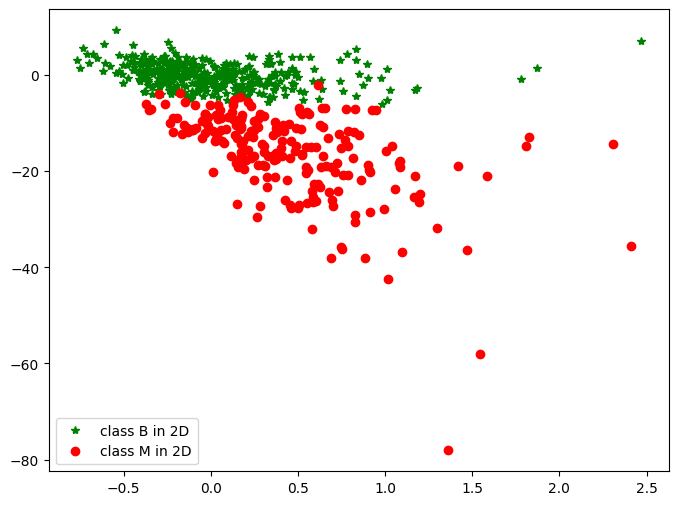

In [208]:
# Plot the reduced 2D data
plt.figure(figsize=(8, 6))
plt.plot(REF_B[:, 0], REF_B[:, 1], 'g*', label='class B in 2D')
plt.plot(REF_M[:, 0], REF_M[:, 1], 'ro', label='class M in 2D')

plt.legend()
plt.show()


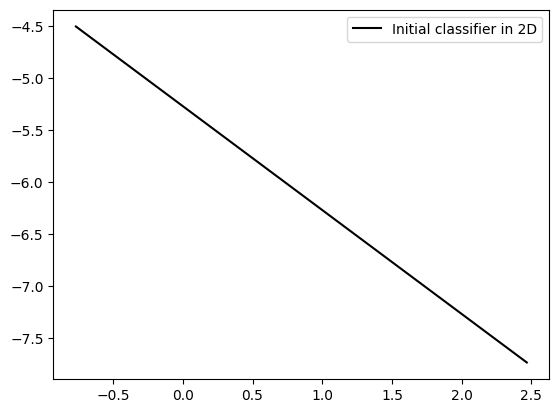

In [209]:
# Initial classifier decision boundary in 2D
a = 1
b = 1
bias = -classifier[-1]
x = np.linspace(min(np.concatenate((REF_B[:, 0], REF_M[:, 0]))), 
                max(np.concatenate((REF_B[:, 0], REF_M[:, 0]))), 100)
y = (-bias - a * x) / b
plt.plot(x, y, 'k', label='Initial classifier in 2D')
plt.legend()
plt.show()

In [210]:
# Refinement
ref = 'SVM'
classifier_refined, err, ref, vector = parameters(REF_B, REF_M, ref)
print(f'Accuracy of refinement: {ERRS(REF_B, REF_M, classifier_refined)}%')

Accuracy of refinement: 98.94551845342706%


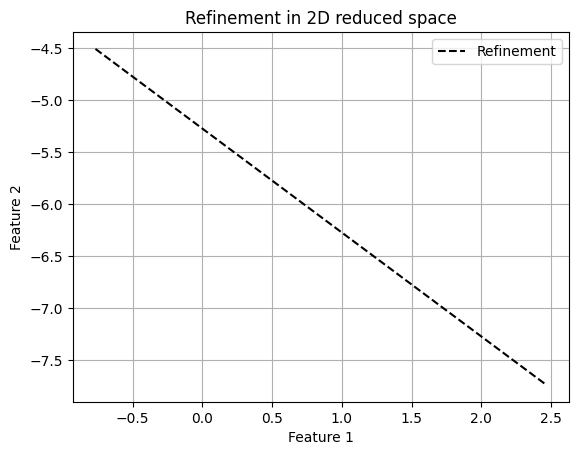

In [211]:
# Refined classifier decision boundary
a = classifier_refined[0]
b = classifier_refined[1]
bias = -classifier_refined[-1]
y = (-bias - a * x) / b
plt.plot(x, y, 'k--', label='Refinement')

# Finalize plot
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Refinement in 2D reduced space')
plt.grid(True)
plt.show()

Accuracy of refinement: 98.94551845342706%


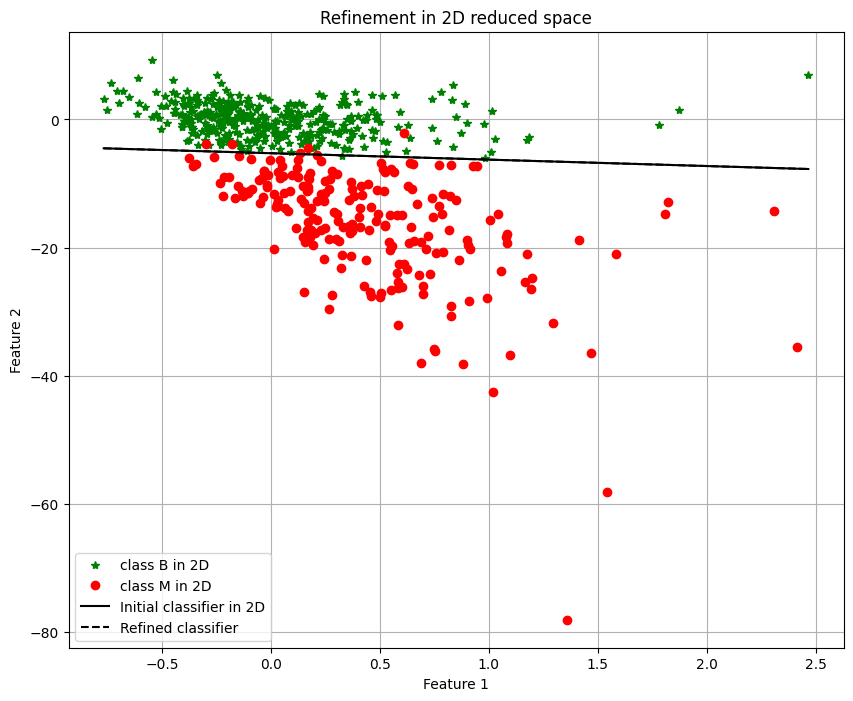

In [212]:
# Create figure
plt.figure(figsize=(10, 8))

# Plot the reduced 2D data
plt.plot(REF_B[:, 0], REF_B[:, 1], 'g*', label='class B in 2D')
plt.plot(REF_M[:, 0], REF_M[:, 1], 'ro', label='class M in 2D')

# Initial classifier decision boundary in 2D
a = 1
b = 1
bias = -classifier[-1]
x = np.linspace(min(np.concatenate((REF_B[:, 0], REF_M[:, 0]))), 
                max(np.concatenate((REF_B[:, 0], REF_M[:, 0]))), 100)
y = (-bias - a * x) / b
plt.plot(x, y, 'k', label='Initial classifier in 2D')

# Refinement
ref = 'SVM'
classifier_refined, err, ref, vector = parameters(REF_B, REF_M, ref)
print(f'Accuracy of refinement: {ERRS(REF_B, REF_M, classifier_refined)}%')

# Refined classifier decision boundary
a = classifier_refined[0]
b = classifier_refined[1]
bias = -classifier_refined[-1]
y = (-bias - a * x) / b
plt.plot(x, y, 'k--', label='Refined classifier')

# Finalize plot
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Refinement in 2D reduced space')
plt.grid(True)
plt.show()
